In [4]:
import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats

In [132]:
data = pd.read_csv('OP_Notes.csv')
data = pd.DataFrame(data)
data.head(5)

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14,36,102) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date of birth,Date of death,Side of THR,f01_fs,Pre-op Date of Harris score,Pre-op Harris function,Pre-op harris pain,Date of Harris score,f04_f011_op_date,Pre-op charnley pain score,...,charnley post-op grade,Charnley post op function,Charnley post op pain,Charnley post op ROM,Post op EQ5D date 1,Post op EQ5D score 1,Post-op Euroqol 1,Post-op Euroqol score 1,post op EQ5D date 2,Post-op EQ5D 2
0,06/01/1912,- -,R,-999,- -,-999,-999,31/07/1988,- -,03=Tolerable - limiting activity,...,NaN,NaN,NaN,NaN,- -,-999.00,- -,-999.0,- -,-999.0
1,13/04/1918,- -,L,-999,- -,-999,-999,31/07/1988,- -,03=Tolerable - limiting activity,...,NaN,NaN,NaN,NaN,- -,-999.00,- -,-999.0,- -,-999.0
2,11/12/1911,02/09/1994,L,-999,- -,-999,-999,01/08/1988,- -,06=No pain,...,NaN,NaN,NaN,NaN,- -,-999.00,- -,-999.0,- -,-999.0
3,13/10/1927,17/01/2000,R,-999,- -,-999,-999,01/08/1988,- -,03=Tolerable - limiting activity,...,03=C,2.0,6.0,5.0,- -,-999.00,- -,-999.0,- -,-999.0
4,17/07/1917,21/10/2016,R,-999,- -,-999,-999,01/08/1988,- -,02=Severe - on walking - prevents all activity,...,01=A,2.0,3.0,4.0,12/03/2010,0.23,- -,-999.0,- -,-999.0


In [7]:
data1 = pd.read_csv('anonymised_data.csv')
data1 = pd.DataFrame(data1)
data1.head()

,DOB,operation date,Date of death,Gender,Pe-op Euroqol exam_date,Euroqol mobility,Euroqol self care,Euroqol activities,Euroqol pain,Euroqol anxiety,...,Post-op EQ5d 6m - 2yrs,6m-2yr mobility,6m-2yr self_care,6m-2yr activities,6m-2yr pain,6m-2yr anxiety,6m-2yr self_score,Unnamed: 77,Complications,Unnamed: 79
0,10/12/1954,19/06/2003,- -,F,- -,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN
1,10/09/1932,02/05/2008,- -,M,23/04/2008,02=I have some problems in walking about,02=I have some problems washing and dressing m...,02=I have some problems with performing my usu...,02=I have moderate pain or discomfort,01=I am not anxious or depressed,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN
2,07/05/1929,24/10/2000,25/02/2015,F,- -,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,30/10/2000: [(_C) Non Hip related] 19=Cardiova...,NaN
3,28/01/1955,22/04/2010,- -,F,21/04/2010,02=I have some problems in walking about,01=I have no problems with self-care,02=I have some problems with performing my usu...,03=I have extreme pain or discomfort,01=I am not anxious or depressed,...,0.69,1.0,1.0,2.0,2.0,1.0,60.0,NaN,NaN,NaN
4,11/04/1930,22/03/2012,- -,F,14/03/2012,02=I have some problems in walking about,02=I have some problems washing and dressing m...,03=I am unable to perform my usual activities,02=I have moderate pain or discomfort,02=I am moderately anxious or depressed,...,0.59,2.0,1.0,2.0,2.0,2.0,70.0,NaN,NaN,NaN


In [8]:
#for col in data1.columns:
#    print(col)

In [9]:
#data1['old_post_op_OHS'] = data1['Old post op OHS ']

In [10]:
data1['change_in_OHS'] = (data1['new post op OHS'] - data1['new pre op OHS'])

In [11]:
change_in_OHS = data1[['Gender','change_in_OHS']]
change_in_OHS

,Gender,change_in_OHS
0,F,-9.0
1,M,28.0
2,F,16.0
3,F,33.0
4,F,5.0
...,...,...
2353,M,9.0
2354,F,4.0
2355,M,30.0
2356,M,23.0


In [12]:
OHS_Female = change_in_OHS[change_in_OHS['Gender'] == 'F']
OHS_Female = OHS_Female.reset_index(drop = True)
OHS_Female

,Gender,change_in_OHS
0,F,-9.0
1,F,16.0
2,F,33.0
3,F,5.0
4,F,23.0
...,...,...
1359,F,19.0
1360,F,29.0
1361,F,22.0
1362,F,4.0


In [13]:
OHS_Male = change_in_OHS[change_in_OHS['Gender'] == 'M']
OHS_Male = OHS_Male.reset_index(drop = True)
OHS_Male

,Gender,change_in_OHS
0,M,28.0
1,M,14.0
2,M,9.0
3,M,21.0
4,M,37.0
...,...,...
989,M,38.0
990,M,9.0
991,M,30.0
992,M,23.0


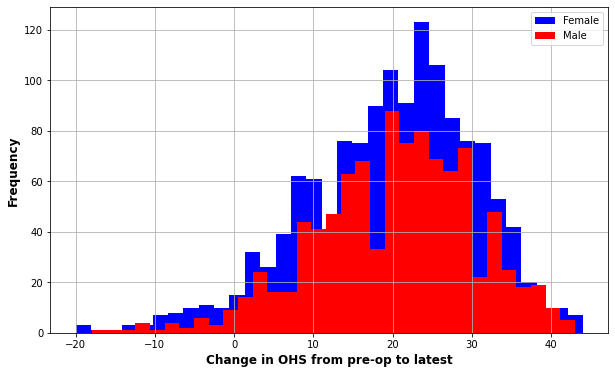

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fig1 = OHS_Female['change_in_OHS'].hist(bins = 33, facecolor='blue')
fig2 = OHS_Male['change_in_OHS'].hist(bins = 33, facecolor='red')
plt.xlabel('Change in OHS from pre-op to latest', size = 12, weight = 'bold')
plt.ylabel('Frequency', size = 12, weight = 'bold')
labels = 'Female', 'Male'
plt.legend(labels)
plt.show()

#Add in the text box with the descriptive statistics

In [15]:
OHS_Male.describe()

,change_in_OHS
count,994.000000
mean,20.294769
std,10.106115
min,-18.000000
25%,14.000000
50%,21.000000
75%,28.000000
max,43.000000


In [16]:
OHS_Female.describe()

,change_in_OHS
count,1364.000000
mean,19.789589
std,10.711607
min,-20.000000
25%,13.000000
50%,21.000000
75%,27.000000
max,44.000000


In [17]:
df1 = data1[['new pre op OHS', 'new post op OHS']]
df1

,new pre op OHS,new post op OHS
0,20.0,11
1,17.0,45
2,20.0,36
3,15.0,48
4,16.0,21
...,...,...
2353,36.0,45
2354,32.0,36
2355,15.0,45
2356,25.0,48


<Figure size 864x432 with 0 Axes>

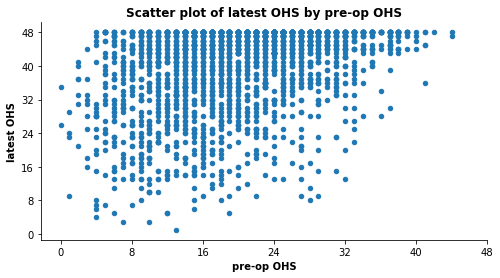

In [18]:
plt.figure(figsize=(12,6))
ax1 = df1.plot.scatter(x='new pre op OHS', y = 'new post op OHS', figsize = (8,4))
ax1.set_xlabel('pre-op OHS', weight = 'bold')
ax1.set_ylabel('latest OHS', weight = 'bold')
ax1.set_title('Scatter plot of latest OHS by pre-op OHS', weight = 'bold')
ax1.set_yticks([0,8,16,24,32,40,48])
ax1.set_xticks([0,8,16,24,32,40,48])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#plt.grid(color='black', which='major', axis='y', linestyle='solid')
plt.show();


In [19]:
# The current CCG threshold is 20. Why??
# MIC : MINIMALLY IMPORTANT CHANGE

In [20]:
data1['change_in_OHS'] = (data1['new post op OHS'] - data1['new pre op OHS'])

In [21]:
df2 = data1[[ 'new pre op OHS', 'new post op OHS','change_in_OHS']]

In [22]:
df2['new_pre_op_OHS'] = df2['new pre op OHS']
#df7.loc['new_pre_op_OHS'] = df7['new pre op OHS']

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/3965014974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_pre_op_OHS'] = df2['new pre op OHS']


In [23]:
df2 = df2[['new_pre_op_OHS', 'new post op OHS', 'change_in_OHS']]
df2

,new_pre_op_OHS,new post op OHS,change_in_OHS
0,20.0,11,-9.0
1,17.0,45,28.0
2,20.0,36,16.0
3,15.0,48,33.0
4,16.0,21,5.0
...,...,...,...
2353,36.0,45,9.0
2354,32.0,36,4.0
2355,15.0,45,30.0
2356,25.0,48,23.0


In [24]:
#ranges = [0,8,16,24,32,40,48]
#df7 = df7.groupby(pd.cut(df7.new_pre_op_OHS, ranges)).count()
df2.insert(loc=0, column='ID', value=[i for i in range(len(df2.index))])
df2 = df2.set_index('ID')

In [25]:
#df7 = df7.groupby(["new_pre_op_OHS"], as_index=False)["change_in_OHS"].count()

In [26]:
df2 = pd.DataFrame(df2)

In [27]:
df2.insert(loc=0, column='ID', value=[i for i in range(len(df2.index))])

In [28]:
df2 = df2.set_index('ID')

In [29]:
df2

,new_pre_op_OHS,new post op OHS,change_in_OHS
ID,,,
0,20.0,11,-9.0
1,17.0,45,28.0
2,20.0,36,16.0
3,15.0,48,33.0
4,16.0,21,5.0
...,...,...,...
2353,36.0,45,9.0
2354,32.0,36,4.0
2355,15.0,45,30.0


In [30]:
ranges = [0,8,16,24,32,40,48]
df2 = df2.groupby(pd.cut(df2.new_pre_op_OHS, ranges)).count()

In [31]:
df2 = df2[['change_in_OHS']]
df2

,change_in_OHS
new_pre_op_OHS,
"(0, 8]",204
"(8, 16]",670
"(16, 24]",804
"(24, 32]",524
"(32, 40]",146
"(40, 48]",8


In [32]:
df2['Cumulative Frequency'] = df2['change_in_OHS'].cumsum()

In [33]:
df2['Frequency'] = df2['change_in_OHS']
df2 = df2[['Frequency', 'Cumulative Frequency']]

In [34]:
df2

,Frequency,Cumulative Frequency
new_pre_op_OHS,,
"(0, 8]",204,204
"(8, 16]",670,874
"(16, 24]",804,1678
"(24, 32]",524,2202
"(32, 40]",146,2348
"(40, 48]",8,2356


In [35]:
data1['change_in_OHS'] = (data1['new post op OHS'] - data1['new pre op OHS'])

In [36]:
df3 = data1[[ 'new pre op OHS', 'new post op OHS','change_in_OHS']]

In [37]:
df3['new_pre_op_OHS'] = df3['new pre op OHS']

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/2948686519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['new_pre_op_OHS'] = df3['new pre op OHS']


In [38]:
df3 = df3[['new_pre_op_OHS', 'new post op OHS', 'change_in_OHS']]
df3

,new_pre_op_OHS,new post op OHS,change_in_OHS
0,20.0,11,-9.0
1,17.0,45,28.0
2,20.0,36,16.0
3,15.0,48,33.0
4,16.0,21,5.0
...,...,...,...
2353,36.0,45,9.0
2354,32.0,36,4.0
2355,15.0,45,30.0
2356,25.0,48,23.0


In [39]:
df3.insert(loc=0, column='ID', value=[i for i in range(len(df3.index))])
df3 = df3.set_index('ID')

In [40]:
df3 = pd.DataFrame(df3)

In [41]:
df3.insert(loc=0, column='ID', value=[i for i in range(len(df3.index))])
df3 = df3.set_index('ID')

In [42]:
df3

,new_pre_op_OHS,new post op OHS,change_in_OHS
ID,,,
0,20.0,11,-9.0
1,17.0,45,28.0
2,20.0,36,16.0
3,15.0,48,33.0
4,16.0,21,5.0
...,...,...,...
2353,36.0,45,9.0
2354,32.0,36,4.0
2355,15.0,45,30.0


In [43]:
ranges = [0,8,16,24,32,40,48]
df3 = df3.groupby(pd.cut(df3.new_pre_op_OHS, ranges)).mean()

In [44]:
df3 = df3[['change_in_OHS']]
df3['Mean Improvement in OHS'] = df3['change_in_OHS']
df3 = df3[['Mean Improvement in OHS']]
df3

,Mean Improvement in OHS
new_pre_op_OHS,
"(0, 8]",27.058824
"(8, 16]",24.208955
"(16, 24]",20.162935
"(24, 32]",14.765267
"(32, 40]",9.500000
"(40, 48]",3.750000


In [45]:
bigdata = pd.concat([df2, df3], axis=1)
bigdata.rename_axis(None, axis=1).rename_axis('Pre-op OHS Band', axis=0)

,Frequency,Cumulative Frequency,Mean Improvement in OHS
Pre-op OHS Band,,,
"(0, 8]",204,204,27.058824
"(8, 16]",670,874,24.208955
"(16, 24]",804,1678,20.162935
"(24, 32]",524,2202,14.765267
"(32, 40]",146,2348,9.500000
"(40, 48]",8,2356,3.750000


In [46]:
df4 = data1[[ 'new pre op OHS', 'new post op OHS','change_in_OHS']]
df4

,new pre op OHS,new post op OHS,change_in_OHS
0,20.0,11,-9.0
1,17.0,45,28.0
2,20.0,36,16.0
3,15.0,48,33.0
4,16.0,21,5.0
...,...,...,...
2353,36.0,45,9.0
2354,32.0,36,4.0
2355,15.0,45,30.0
2356,25.0,48,23.0


In [47]:
df4['new_pre_op_OHS'] = df4['new pre op OHS']
df4 = df4[['new_pre_op_OHS', 'new post op OHS', 'change_in_OHS']]

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/2327153968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['new_pre_op_OHS'] = df4['new pre op OHS']


In [48]:
df4.insert(loc=0, column='ID', value=[i for i in range(len(df4.index))])
df4 = df4.set_index('ID')
df4 = pd.DataFrame(df4)
df4

,new_pre_op_OHS,new post op OHS,change_in_OHS
ID,,,
0,20.0,11,-9.0
1,17.0,45,28.0
2,20.0,36,16.0
3,15.0,48,33.0
4,16.0,21,5.0
...,...,...,...
2353,36.0,45,9.0
2354,32.0,36,4.0
2355,15.0,45,30.0


In [49]:
ranges = [0,8,16,24,32,40,48]
df4 = df4.groupby(pd.cut(df4.new_pre_op_OHS, ranges)).median()

In [50]:
df4['pre op OHS'] = df4['new_pre_op_OHS']
df4['latest OHS'] = df4['new post op OHS']

In [51]:
df4 = df4[['pre op OHS', 'latest OHS']]
df4 = df4.rename_axis(None, axis=1).rename_axis('Pre-op OHS Band', axis=0)

In [52]:
df4

,pre op OHS,latest OHS
Pre-op OHS Band,,
"(0, 8]",6.0,35.0
"(8, 16]",13.0,41.0
"(16, 24]",20.0,44.0
"(24, 32]",28.0,46.0
"(32, 40]",35.0,47.0
"(40, 48]",41.0,47.5


In [53]:
df4.insert(0, 'Pre-op OHS Band', ['0-8', '8-16', '16-24', '24-32', '32-40', '40-48'], True)
df4

,Pre-op OHS Band,pre op OHS,latest OHS
Pre-op OHS Band,,,
"(0, 8]",0-8,6.0,35.0
"(8, 16]",8-16,13.0,41.0
"(16, 24]",16-24,20.0,44.0
"(24, 32]",24-32,28.0,46.0
"(32, 40]",32-40,35.0,47.0
"(40, 48]",40-48,41.0,47.5


In [54]:
df4 = df4.reset_index(drop=True)
df4
#ax5 = df4.plot.scatter('pre op OHS', 'Pre-op OHS Band')

,Pre-op OHS Band,pre op OHS,latest OHS
0,0-8,6.0,35.0
1,8-16,13.0,41.0
2,16-24,20.0,44.0
3,24-32,28.0,46.0
4,32-40,35.0,47.0
5,40-48,41.0,47.5


In [55]:
#pre_op = df4['pre op OHS'].tolist()
#post_op = df4['latest OHS'].tolist()

In [56]:
#plt.plot(pre_op, marker=".", color="#5bc0de")
#plt.plot(post_op, marker=".", color="#E8743B")

In [57]:
df5 = df4[['pre op OHS']]
df5['OHS'] = df5['pre op OHS']
df5['Pre op OHS']='pre-op OHS'
df5 = df5[['Pre op OHS', 'OHS']]
df5

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/2862792697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['OHS'] = df5['pre op OHS']


,Pre op OHS,OHS
0,pre-op OHS,6.0
1,pre-op OHS,13.0
2,pre-op OHS,20.0
3,pre-op OHS,28.0
4,pre-op OHS,35.0
5,pre-op OHS,41.0


In [58]:
df6 = df4[['latest OHS']]
df6['OHS'] = df6['latest OHS']
df6['Latest OHS']='latest OHS'
df6 = df6[['Latest OHS', 'OHS']]
df6

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/979473267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['OHS'] = df6['latest OHS']


,Latest OHS,OHS
0,latest OHS,35.0
1,latest OHS,41.0
2,latest OHS,44.0
3,latest OHS,46.0
4,latest OHS,47.0
5,latest OHS,47.5


In [59]:
bigdata1 = pd.concat([df5, df6], axis=1)
bigdata1

,Pre op OHS,OHS,Latest OHS,OHS
0,pre-op OHS,6.0,latest OHS,35.0
1,pre-op OHS,13.0,latest OHS,41.0
2,pre-op OHS,20.0,latest OHS,44.0
3,pre-op OHS,28.0,latest OHS,46.0
4,pre-op OHS,35.0,latest OHS,47.0
5,pre-op OHS,41.0,latest OHS,47.5


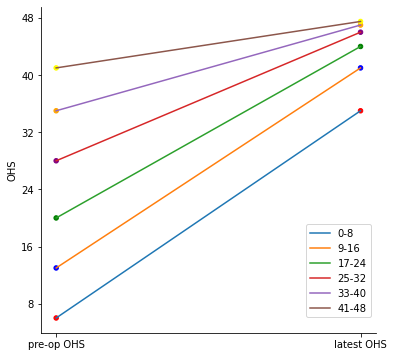

In [60]:
ax5 = df5.plot.scatter('Pre op OHS', 'OHS', figsize = (6,6), color=["red", "blue", "green", "purple", "orange", "yellow"])
df6.plot.scatter('Latest OHS', 'OHS', ax=ax5, color=["red", "blue", "green", "purple", "orange", "yellow"])
#df6.plot.line('Pre op OHS', 'OHS', ax = ax5)
ax5.set_yticks([0,8,16,24,32,40,48])
ax5.set_xticks(['pre-op OHS', 'latest OHS'])
ax5.set_xlabel('')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
x1 = df5['Pre op OHS'].tolist()
x2 = df6['Latest OHS'].tolist()
y1 = df5['OHS'].tolist()
y2 = df6['OHS'].tolist()
for i in range(len(x1)):     
    plt.plot([x1[i],x2[i]], [y1[i],y2[i]])
labels = ['0-8', '9-16', '17-24', '25-32', '33-40', '41-48']
plt.legend(['0-8', '9-16', '17-24', '25-32', '33-40', '41-48'], loc = 'center right', bbox_to_anchor=(0., 0.14, 1., .102))
plt.show();

### Descriptive statistics

In [61]:
df4 = data1[[ 'new pre op OHS', 'new post op OHS','change_in_OHS']]

In [62]:
stats = df4.describe()
stats = stats.iloc[1: , :]
stats

,new pre op OHS,new post op OHS,change_in_OHS
mean,19.729432,39.731976,20.002545
std,8.182304,9.762704,10.461437
min,0.000000,1.000000,-20.000000
25%,14.000000,35.000000,13.000000
50%,20.000000,44.000000,21.000000
75%,25.000000,47.000000,27.000000
max,44.000000,48.000000,44.000000


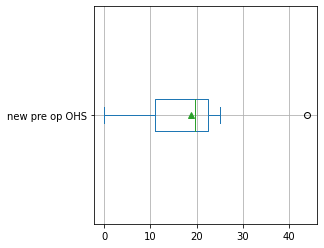

In [63]:
ax2 = stats['new pre op OHS'].plot.box(figsize=(4, 4), showmeans=True, grid=True, vert=False)

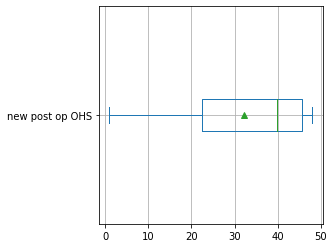

In [64]:
ax3 = stats['new post op OHS'].plot.box(figsize=(4, 4), showmeans=True, grid=True, vert=False)

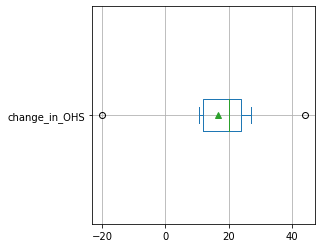

In [65]:
ax4 = stats['change_in_OHS'].plot.box(figsize=(4, 4), showmeans=True, grid=True, vert=False)

In [66]:
#median1 = df3['new_pre_op_OHS'].median()
#median1

## Comparison between the datasets

In [67]:
data = pd.read_csv('OP_Notes.csv')
data = pd.DataFrame(data)
data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'OP_Notes.csv'

In [68]:
data1 = pd.read_csv('anonymised_data.csv')
data1 = pd.DataFrame(data1)
data1.head(2)

,DOB,operation date,Date of death,Gender,Pe-op Euroqol exam_date,Euroqol mobility,Euroqol self care,Euroqol activities,Euroqol pain,Euroqol anxiety,...,Post-op EQ5d 6m - 2yrs,6m-2yr mobility,6m-2yr self_care,6m-2yr activities,6m-2yr pain,6m-2yr anxiety,6m-2yr self_score,Unnamed: 77,Complications,Unnamed: 79
0,10/12/1954,19/06/2003,- -,F,- -,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN
1,10/09/1932,02/05/2008,- -,M,23/04/2008,02=I have some problems in walking about,02=I have some problems washing and dressing m...,02=I have some problems with performing my usu...,02=I have moderate pain or discomfort,01=I am not anxious or depressed,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN


In [69]:
data1['change_in_OHS'] = (data1['new post op OHS'] - data1['new pre op OHS'])

In [70]:
pain_df = data1[['new pre op OHS', 'new post op OHS','change_in_OHS','OHS 1 pre-op Pain','OHS 1 post-op pain','OHS 9 pre-op Limp','OHS 9 post -op Limp', 'OHS 10 pre-op Severe pain', 'OHS 10 post-op Severe pain', 'OHS 12 pre-op night pain', 'OHS 12 post-op night pain' ]]
pain_df.head(5)

,new pre op OHS,new post op OHS,change_in_OHS,OHS 1 pre-op Pain,OHS 1 post-op pain,OHS 9 pre-op Limp,OHS 9 post -op Limp,OHS 10 pre-op Severe pain,OHS 10 post-op Severe pain,OHS 12 pre-op night pain,OHS 12 post-op night pain
0,20.0,11,-9.0,1,0,2,0,3,0,0,0
1,17.0,45,28.0,1,4,0,4,2,4,0,4
2,20.0,36,16.0,0,4,1,3,2,4,0,3
3,15.0,48,33.0,0,4,0,4,2,4,1,4
4,16.0,21,5.0,1,0,1,3,3,3,1,1


In [71]:
function_df = data1[['new pre op OHS', 'new post op OHS','change_in_OHS','OHS 2 pre-op washing', 'OHS 2 post-op washing', 'OHS 3 pre-op pub transport', 'OHS 3 post-op pub transport', 'OHS 4 pre-op Socks', 'OHS 4 post-op Socks', 'OHS 5 pre-op Shopping', 'OHS 5 post-op Shopping', 'OHS 6 pre-op Walking', 'OHS 6 post-op Walking', 'OHS 7 pre-op Stairs', 'OHS 7 post-op stairs', 'OHS 8 pre-op Chair', 'OHS 8 post-op Chair', 'OHS 11 pre-op Work', 'OHS 11 post-op Work']]
function_df.head(5)

,new pre op OHS,new post op OHS,change_in_OHS,OHS 2 pre-op washing,OHS 2 post-op washing,OHS 3 pre-op pub transport,OHS 3 post-op pub transport,OHS 4 pre-op Socks,OHS 4 post-op Socks,OHS 5 pre-op Shopping,OHS 5 post-op Shopping,OHS 6 pre-op Walking,OHS 6 post-op Walking,OHS 7 pre-op Stairs,OHS 7 post-op stairs,OHS 8 pre-op Chair,OHS 8 post-op Chair,OHS 11 pre-op Work,OHS 11 post-op Work
0,20.0,11,-9.0,1,1,2,1,1,1,2,1,3,3,2,2,1,1,2,1
1,17.0,45,28.0,2,3,2,4,1,2,2,4,2,4,2,4,2,4,1,4
2,20.0,36,16.0,3,2,2,4,3,3,2,4,2,0,1,2,2,4,2,3
3,15.0,48,33.0,1,4,1,4,1,4,1,4,2,4,2,4,3,4,1,4
4,16.0,21,5.0,2,2,2,2,1,2,1,2,1,2,2,1,1,1,0,2


In [72]:
change_df = data1[['new pre op OHS', 'new post op OHS','change_in_OHS','Change in Pain', 'Change in washing', 'Change in pub transport', 'Change in socks', 'Change in shopping', 'Change in walking', 'Change in stairs', 'Change in chair', 'Change in limp', 'Change in severe pain', 'Change in work', 'Change in night pain']]
change_df.head(5)

,new pre op OHS,new post op OHS,change_in_OHS,Change in Pain,Change in washing,Change in pub transport,Change in socks,Change in shopping,Change in walking,Change in stairs,Change in chair,Change in limp,Change in severe pain,Change in work,Change in night pain
0,20.0,11,-9.0,-1,0,-1,0,-1,0,0,0,-2,-3,-1,0
1,17.0,45,28.0,3,1,2,1,2,2,2,2,4,2,3,4
2,20.0,36,16.0,4,-1,2,0,2,-2,1,2,2,2,1,3
3,15.0,48,33.0,4,3,3,3,3,2,2,1,4,2,3,3
4,16.0,21,5.0,-1,0,0,1,1,1,-1,0,2,0,2,0


In [73]:
pain_change_df = data1[['new pre op OHS', 'new post op OHS','change_in_OHS','Change in Pain', 'Change in limp', 'Change in severe pain', 'Change in night pain']]
pain_change_df.head(5)

,new pre op OHS,new post op OHS,change_in_OHS,Change in Pain,Change in limp,Change in severe pain,Change in night pain
0,20.0,11,-9.0,-1,-2,-3,0
1,17.0,45,28.0,3,4,2,4
2,20.0,36,16.0,4,2,2,3
3,15.0,48,33.0,4,4,2,3
4,16.0,21,5.0,-1,2,0,0


In [74]:
function_change_df = data1[['new pre op OHS', 'new post op OHS','change_in_OHS','Change in washing', 'Change in pub transport', 'Change in socks', 'Change in shopping', 'Change in walking', 'Change in stairs', 'Change in chair', 'Change in work']]
function_change_df.head(5)

,new pre op OHS,new post op OHS,change_in_OHS,Change in washing,Change in pub transport,Change in socks,Change in shopping,Change in walking,Change in stairs,Change in chair,Change in work
0,20.0,11,-9.0,0,-1,0,-1,0,0,0,-1
1,17.0,45,28.0,1,2,1,2,2,2,2,3
2,20.0,36,16.0,-1,2,0,2,-2,1,2,1
3,15.0,48,33.0,3,3,3,3,2,2,1,3
4,16.0,21,5.0,0,0,1,1,1,-1,0,2


In [75]:
#ax6 = pain_change_df.plot.scatter(x='Change in Pain', y = 'Change in limp', figsize = (8,4))
#ax6 = pain_change_df['Change in Pain'].plot()

In [76]:
pain_change_df.insert(loc=0, column='ID', value=[i for i in range(len(pain_change_df.index))])
pain_change_df = pain_change_df.set_index('ID')

In [77]:
pain_change_df['new_pre_op_OHS'] = pain_change_df['new pre op OHS']

In [78]:
ranges = [0,8,16,24,32,40,48]
pain_change_df = pain_change_df.groupby(pd.cut(pain_change_df.new_pre_op_OHS, ranges)).mean()
pain_change_df

,new pre op OHS,new post op OHS,change_in_OHS,Change in Pain,Change in limp,Change in severe pain,Change in night pain,new_pre_op_OHS
new_pre_op_OHS,,,,,,,,
"(0, 8]",5.995098,33.053922,27.058824,2.588235,2.705882,2.705882,2.583333,5.995098
"(8, 16]",12.941791,37.150746,24.208955,2.502985,2.702985,2.276119,2.611940,12.941791
"(16, 24]",20.462687,40.625622,20.162935,2.338308,2.569652,1.740050,2.171642,20.462687
"(24, 32]",27.980916,42.746183,14.765267,2.127863,2.169847,1.291985,1.627863,27.980916
"(32, 40]",35.472603,44.972603,9.500000,1.732877,1.787671,0.719178,1.000000,35.472603
"(40, 48]",41.875000,45.625000,3.750000,0.875000,1.375000,0.875000,0.375000,41.875000


In [79]:
pain_change_df = pain_change_df[['Change in Pain', 'Change in limp', 'Change in severe pain', 'Change in night pain']]
pain_change_df

,Change in Pain,Change in limp,Change in severe pain,Change in night pain
new_pre_op_OHS,,,,
"(0, 8]",2.588235,2.705882,2.705882,2.583333
"(8, 16]",2.502985,2.702985,2.276119,2.611940
"(16, 24]",2.338308,2.569652,1.740050,2.171642
"(24, 32]",2.127863,2.169847,1.291985,1.627863
"(32, 40]",1.732877,1.787671,0.719178,1.000000
"(40, 48]",0.875000,1.375000,0.875000,0.375000


In [80]:
#pain_change_df1 = pain_change_df[['Change in Pain']]
#pain_change_df1['OHS'] = pain_change_df1['Change in Pain']
#pain_change_df1['Change in Pain']='Change in Pain'
#pain_change_df1 = pain_change_df1[['Change in Pain', 'OHS']]

#pain_change_df2 = pain_change_df[['Change in limp']]
#pain_change_df2['OHS'] = pain_change_df2['Change in limp']
#pain_change_df2['Change in limp']='Change in limp'
#pain_change_df2 = pain_change_df2[['Change in limp', 'OHS']]

In [81]:
function_change_df.insert(loc=0, column='ID', value=[i for i in range(len(function_change_df.index))])
function_change_df = function_change_df.set_index('ID')

In [82]:
function_change_df['new_pre_op_OHS'] = function_change_df['new pre op OHS']

In [83]:
ranges = [0,8,16,24,32,40,48]
function_change_df = function_change_df.groupby(pd.cut(function_change_df.new_pre_op_OHS, ranges)).mean()
function_change_df

,new pre op OHS,new post op OHS,change_in_OHS,Change in washing,Change in pub transport,Change in socks,Change in shopping,Change in walking,Change in stairs,Change in chair,Change in work,new_pre_op_OHS
new_pre_op_OHS,,,,,,,,,,,,
"(0, 8]",5.995098,33.053922,27.058824,1.892157,1.627451,1.828431,2.073529,2.259804,1.627451,2.151961,2.406863,5.995098
"(8, 16]",12.941791,37.150746,24.208955,1.526866,1.538806,1.705970,1.794030,1.497015,1.465672,2.008955,2.161194,12.941791
"(16, 24]",20.462687,40.625622,20.162935,1.154229,1.296020,1.445274,1.320896,1.101990,1.241294,1.675373,1.861940,20.462687
"(24, 32]",27.980916,42.746183,14.765267,0.790076,1.041985,1.082061,0.694656,0.694656,0.822519,1.213740,1.362595,27.980916
"(32, 40]",35.472603,44.972603,9.500000,0.458904,0.589041,0.801370,0.315068,0.376712,0.561644,0.801370,0.938356,35.472603
"(40, 48]",41.875000,45.625000,3.750000,-0.125000,0.125000,0.375000,-0.375000,0.375000,-0.375000,0.000000,0.250000,41.875000


In [84]:
function_change_df = function_change_df[['Change in washing', 'Change in pub transport', 'Change in socks', 'Change in shopping', 'Change in walking', 'Change in stairs', 'Change in chair', 'Change in work']]
function_change_df

,Change in washing,Change in pub transport,Change in socks,Change in shopping,Change in walking,Change in stairs,Change in chair,Change in work
new_pre_op_OHS,,,,,,,,
"(0, 8]",1.892157,1.627451,1.828431,2.073529,2.259804,1.627451,2.151961,2.406863
"(8, 16]",1.526866,1.538806,1.705970,1.794030,1.497015,1.465672,2.008955,2.161194
"(16, 24]",1.154229,1.296020,1.445274,1.320896,1.101990,1.241294,1.675373,1.861940
"(24, 32]",0.790076,1.041985,1.082061,0.694656,0.694656,0.822519,1.213740,1.362595
"(32, 40]",0.458904,0.589041,0.801370,0.315068,0.376712,0.561644,0.801370,0.938356
"(40, 48]",-0.125000,0.125000,0.375000,-0.375000,0.375000,-0.375000,0.000000,0.250000


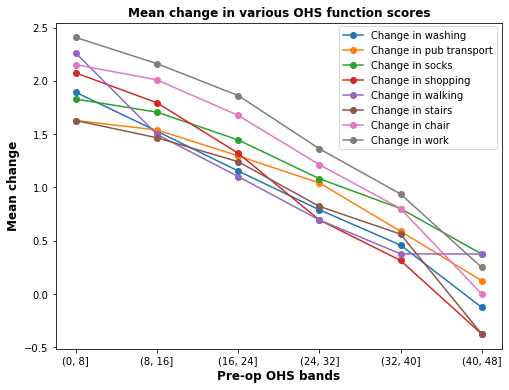

In [85]:
ax6 = function_change_df.plot(marker = 'o', figsize = (8,6))
plt.legend(loc = 'center right', bbox_to_anchor=(0., 0.70, 1, .202))
ax6.set_xlabel('Pre-op OHS bands', size = 12, weight = 'bold')
ax6.set_ylabel('Mean change', size = 12, weight = 'bold')
ax6.set_title("Mean change in various OHS function scores", size = 12, weight = 'bold')
plt.show();

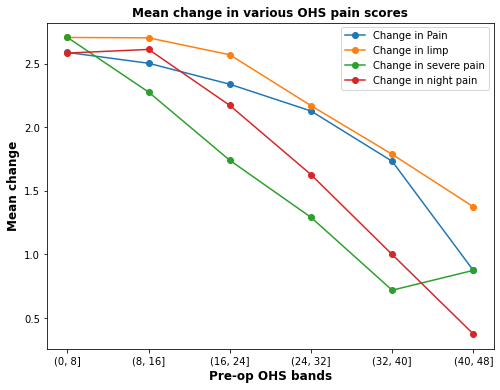

In [86]:
ax7 = pain_change_df.plot(marker = 'o', figsize = (8,6))
plt.legend(loc = 'center right', bbox_to_anchor=(0., 0.79, 1, .202))
ax7.set_xlabel('Pre-op OHS bands', size = 12, weight = 'bold')
ax7.set_ylabel('Mean change', size = 12, weight = 'bold')
ax7.set_title("Mean change in various OHS pain scores", size = 12, weight = 'bold')
plt.show();

In [87]:
df7 = data1[[ 'new pre op OHS', 'new post op OHS','change_in_OHS']]
df7['new_pre_op_OHS'] = df7['new pre op OHS']
df7 = df7[['new_pre_op_OHS', 'new post op OHS', 'change_in_OHS']]
df7.insert(loc=0, column='ID', value=[i for i in range(len(df7.index))])
df7 = df7.set_index('ID')
df7 = pd.DataFrame(df7)
ranges = [0,16,24,32,40,48]
df7 = df7.groupby(pd.cut(df7.new_pre_op_OHS, ranges)).median()
df7['pre op OHS'] = df7['new_pre_op_OHS']
df7['latest OHS'] = df7['new post op OHS']
df7 = df7[['pre op OHS', 'latest OHS']]
df7 = df7.rename_axis(None, axis=1).rename_axis('Pre-op OHS Band', axis=0)
df7.insert(0, 'Pre-op OHS Band', ['0-16', '16-24', '24-32', '32-40', '40-48'], True)
df7 = df7.reset_index(drop=True)
#df7

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/1184939514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['new_pre_op_OHS'] = df7['new pre op OHS']


In [88]:
df8 = df7[['pre op OHS']]
df8['OHS'] = df8['pre op OHS']
df8['Pre op OHS']='pre-op OHS'
df8 = df8[['Pre op OHS', 'OHS']]
df8

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/347039691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['OHS'] = df8['pre op OHS']


,Pre op OHS,OHS
0,pre-op OHS,12.0
1,pre-op OHS,20.0
2,pre-op OHS,28.0
3,pre-op OHS,35.0
4,pre-op OHS,41.0


In [89]:
df9 = df7[['latest OHS']]
df9['OHS'] = df9['latest OHS']
df9['Latest OHS']='latest OHS'
df9 = df9[['Latest OHS', 'OHS']]
df9

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/2698081830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['OHS'] = df9['latest OHS']


,Latest OHS,OHS
0,latest OHS,40.0
1,latest OHS,44.0
2,latest OHS,46.0
3,latest OHS,47.0
4,latest OHS,47.5


In [90]:
bigdata2 = pd.concat([df8, df9], axis=1)
bigdata2

,Pre op OHS,OHS,Latest OHS,OHS
0,pre-op OHS,12.0,latest OHS,40.0
1,pre-op OHS,20.0,latest OHS,44.0
2,pre-op OHS,28.0,latest OHS,46.0
3,pre-op OHS,35.0,latest OHS,47.0
4,pre-op OHS,41.0,latest OHS,47.5


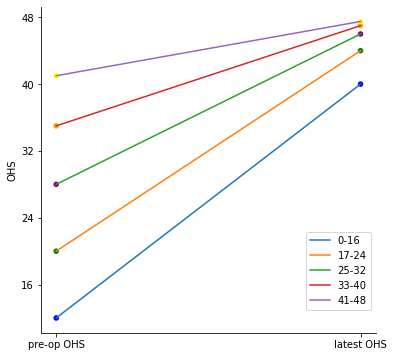

In [91]:
ax8 = df8.plot.scatter('Pre op OHS', 'OHS', figsize = (6,6), color=[ "blue", "green", "purple", "orange", "yellow"])
df9.plot.scatter('Latest OHS', 'OHS', ax=ax8, color=["blue", "green", "purple", "orange", "yellow"])
#df6.plot.line('Pre op OHS', 'OHS', ax = ax5)
ax8.set_yticks([0,8,16,24,32,40,48])
ax8.set_xticks(['pre-op OHS', 'latest OHS'])
ax8.set_xlabel('')
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
x1 = df8['Pre op OHS'].tolist()
x2 = df9['Latest OHS'].tolist()
y1 = df8['OHS'].tolist()
y2 = df9['OHS'].tolist()
for i in range(len(x1)):     
    plt.plot([x1[i],x2[i]], [y1[i],y2[i]])
labels = ['0-16', '17-24', '25-32', '33-40', '41-48']
plt.legend(['0-16', '17-24', '25-32', '33-40', '41-48'], loc = 'center right', bbox_to_anchor=(0., 0.14, 1., .102))
plt.show();

In [92]:
df10 = data1[[ 'new pre op OHS', 'new post op OHS','change_in_OHS']]
df10['new_pre_op_OHS'] = df10['new pre op OHS']
df10 = df10[['new_pre_op_OHS', 'new post op OHS', 'change_in_OHS']]
df10.insert(loc=0, column='ID', value=[i for i in range(len(df10.index))])
df10 = df10.set_index('ID')
df10 = pd.DataFrame(df10)
ranges = [0,24,32,40,48]
df10 = df10.groupby(pd.cut(df10.new_pre_op_OHS, ranges)).median()
df10['pre op OHS'] = df10['new_pre_op_OHS']
df10['latest OHS'] = df10['new post op OHS']
df10 = df10[['pre op OHS', 'latest OHS']]
df10 = df10.rename_axis(None, axis=1).rename_axis('Pre-op OHS Band', axis=0)
df10.insert(0, 'Pre-op OHS Band', ['0-24', '24-32', '32-40', '40-48'], True)
df10 = df10.reset_index(drop=True)

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/3321637452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['new_pre_op_OHS'] = df10['new pre op OHS']


In [93]:
df11 = df10[['pre op OHS']]
df11['OHS'] = df11['pre op OHS']
df11['Pre op OHS']='pre-op OHS'
df11 = df11[['Pre op OHS', 'OHS']]
df11

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/2991123948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['OHS'] = df11['pre op OHS']


,Pre op OHS,OHS
0,pre-op OHS,16.0
1,pre-op OHS,28.0
2,pre-op OHS,35.0
3,pre-op OHS,41.0


In [94]:
df12 = df10[['latest OHS']]
df12['OHS'] = df12['latest OHS']
df12['Latest OHS']='latest OHS'
df12 = df12[['Latest OHS', 'OHS']]
df12

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/1313403843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['OHS'] = df12['latest OHS']


,Latest OHS,OHS
0,latest OHS,42.0
1,latest OHS,46.0
2,latest OHS,47.0
3,latest OHS,47.5


In [95]:
bigdata3 = pd.concat([df11, df12], axis=1)
bigdata3

,Pre op OHS,OHS,Latest OHS,OHS
0,pre-op OHS,16.0,latest OHS,42.0
1,pre-op OHS,28.0,latest OHS,46.0
2,pre-op OHS,35.0,latest OHS,47.0
3,pre-op OHS,41.0,latest OHS,47.5


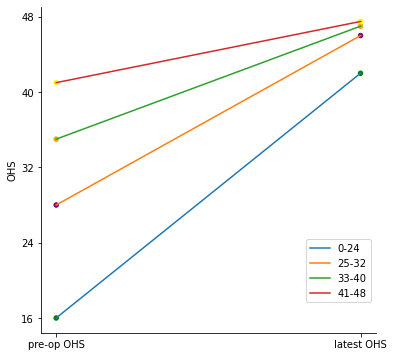

In [96]:
ax9 = df11.plot.scatter('Pre op OHS', 'OHS', figsize = (6,6), color=[ "green", "purple", "orange", "yellow"])
df12.plot.scatter('Latest OHS', 'OHS', ax=ax9, color=["green", "purple", "orange", "yellow"])
#df6.plot.line('Pre op OHS', 'OHS', ax = ax5)
ax9.set_yticks([0,8,16,24,32,40,48])
ax9.set_xticks(['pre-op OHS', 'latest OHS'])
ax9.set_xlabel('')
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
x1 = df11['Pre op OHS'].tolist()
x2 = df12['Latest OHS'].tolist()
y1 = df11['OHS'].tolist()
y2 = df12['OHS'].tolist()
for i in range(len(x1)):     
    plt.plot([x1[i],x2[i]], [y1[i],y2[i]])
labels = ['0-24', '25-32', '33-40', '41-48']
plt.legend(['0-24', '25-32', '33-40', '41-48'], loc = 'center right', bbox_to_anchor=(0., 0.14, 1., .102))
plt.show();

In [97]:
df13 = data1[[ 'new pre op OHS', 'new post op OHS','change_in_OHS']]
df13['new_pre_op_OHS'] = df13['new pre op OHS']
df13 = df13[['new_pre_op_OHS', 'new post op OHS', 'change_in_OHS']]
df13.insert(loc=0, column='ID', value=[i for i in range(len(df13.index))])
df13 = df13.set_index('ID')
df13 = pd.DataFrame(df13)
ranges = [0,32,40,48]
df13 = df13.groupby(pd.cut(df13.new_pre_op_OHS, ranges)).median()
df13['pre op OHS'] = df13['new_pre_op_OHS']
df13['latest OHS'] = df13['new post op OHS']
df13 = df13[['pre op OHS', 'latest OHS']]
df13 = df13.rename_axis(None, axis=1).rename_axis('Pre-op OHS Band', axis=0)
df13.insert(0, 'Pre-op OHS Band', ['0-32', '32-40', '40-48'], True)
df13 = df13.reset_index(drop=True)

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/3104422716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['new_pre_op_OHS'] = df13['new pre op OHS']


In [98]:
df14 = df13[['pre op OHS']]
df14['OHS'] = df14['pre op OHS']
df14['Pre op OHS']='pre-op OHS'
df14 = df14[['Pre op OHS', 'OHS']]
df14

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/3975386121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14['OHS'] = df14['pre op OHS']


,Pre op OHS,OHS
0,pre-op OHS,19.0
1,pre-op OHS,35.0
2,pre-op OHS,41.0


In [99]:
df15 = df13[['latest OHS']]
df15['OHS'] = df15['latest OHS']
df15['Latest OHS']='latest OHS'
df15 = df15[['Latest OHS', 'OHS']]
df15

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/2642755195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15['OHS'] = df15['latest OHS']


,Latest OHS,OHS
0,latest OHS,43.0
1,latest OHS,47.0
2,latest OHS,47.5


In [100]:
bigdata4 = pd.concat([df14, df15], axis=1)
bigdata4

,Pre op OHS,OHS,Latest OHS,OHS
0,pre-op OHS,19.0,latest OHS,43.0
1,pre-op OHS,35.0,latest OHS,47.0
2,pre-op OHS,41.0,latest OHS,47.5


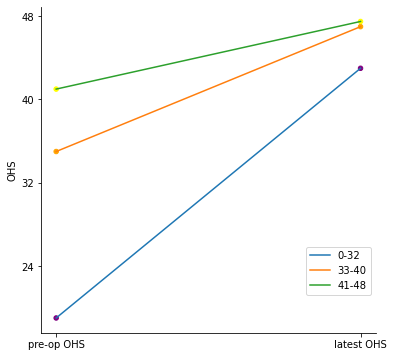

In [101]:
ax10 = df14.plot.scatter('Pre op OHS', 'OHS', figsize = (6,6), color=["purple", "orange", "yellow"])
df15.plot.scatter('Latest OHS', 'OHS', ax=ax10, color=["purple", "orange", "yellow"])
#df6.plot.line('Pre op OHS', 'OHS', ax = ax5)
ax10.set_yticks([0,8,16,24,32,40,48])
ax10.set_xticks(['pre-op OHS', 'latest OHS'])
ax10.set_xlabel('')
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
x1 = df14['Pre op OHS'].tolist()
x2 = df15['Latest OHS'].tolist()
y1 = df14['OHS'].tolist()
y2 = df15['OHS'].tolist()
for i in range(len(x1)):     
    plt.plot([x1[i],x2[i]], [y1[i],y2[i]])
labels = ['0-32', '33-40', '41-48']
plt.legend(['0-32', '33-40', '41-48'], loc = 'center right', bbox_to_anchor=(0., 0.14, 1., .102))
plt.show();

In [102]:
df16 = data1[[ 'new pre op OHS', 'new post op OHS','change_in_OHS']]
df16['new_pre_op_OHS'] = df16['new pre op OHS']
df16 = df16[['new_pre_op_OHS', 'new post op OHS', 'change_in_OHS']]
df16.insert(loc=0, column='ID', value=[i for i in range(len(df16.index))])
df16 = df16.set_index('ID')
df16 = pd.DataFrame(df16)
ranges = [0,40,48]
df16 = df16.groupby(pd.cut(df16.new_pre_op_OHS, ranges)).median()
df16['pre op OHS'] = df16['new_pre_op_OHS']
df16['latest OHS'] = df16['new post op OHS']
df16 = df16[['pre op OHS', 'latest OHS']]
df16 = df16.rename_axis(None, axis=1).rename_axis('Pre-op OHS Band', axis=0)
df16.insert(0, 'Pre-op OHS Band', ['0-40', '40-48'], True)
df16 = df16.reset_index(drop=True)

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/700478816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['new_pre_op_OHS'] = df16['new pre op OHS']


In [103]:
df17 = df16[['pre op OHS']]
df17['OHS'] = df17['pre op OHS']
df17['Pre op OHS']='pre-op OHS'
df17 = df17[['Pre op OHS', 'OHS']]
df17

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/1748418263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17['OHS'] = df17['pre op OHS']


,Pre op OHS,OHS
0,pre-op OHS,19.5
1,pre-op OHS,41.0


In [104]:
df18 = df16[['latest OHS']]
df18['OHS'] = df18['latest OHS']
df18['Latest OHS']='latest OHS'
df18 = df18[['Latest OHS', 'OHS']]
df18

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/221809871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['OHS'] = df18['latest OHS']


,Latest OHS,OHS
0,latest OHS,44.0
1,latest OHS,47.5


In [105]:
bigdata5 = pd.concat([df17, df18], axis=1)
bigdata5

,Pre op OHS,OHS,Latest OHS,OHS
0,pre-op OHS,19.5,latest OHS,44.0
1,pre-op OHS,41.0,latest OHS,47.5


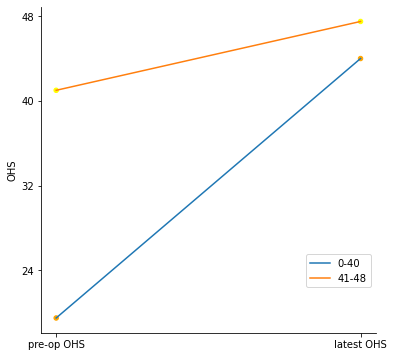

In [106]:
ax11 = df17.plot.scatter('Pre op OHS', 'OHS', figsize = (6,6), color=[ "orange", "yellow"])
df18.plot.scatter('Latest OHS', 'OHS', ax=ax11, color=[ "orange", "yellow"])
#df6.plot.line('Pre op OHS', 'OHS', ax = ax5)
ax11.set_yticks([0,8,16,24,32,40,48])
ax11.set_xticks(['pre-op OHS', 'latest OHS'])
ax11.set_xlabel('')
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
x1 = df17['Pre op OHS'].tolist()
x2 = df18['Latest OHS'].tolist()
y1 = df17['OHS'].tolist()
y2 = df18['OHS'].tolist()
for i in range(len(x1)):     
    plt.plot([x1[i],x2[i]], [y1[i],y2[i]])
labels = ['0-40', '41-48']
plt.legend(['0-40', '41-48'], loc = 'center right', bbox_to_anchor=(0., 0.14, 1., .102))
plt.show();

In [107]:
df19 = data1[['DOB',  'Gender','new pre op OHS', 'new post op OHS','change_in_OHS']]
df19.head()

,DOB,Gender,new pre op OHS,new post op OHS,change_in_OHS
0,10/12/1954,F,20.0,11,-9.0
1,10/09/1932,M,17.0,45,28.0
2,07/05/1929,F,20.0,36,16.0
3,28/01/1955,F,15.0,48,33.0
4,11/04/1930,F,16.0,21,5.0


In [108]:
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df19['Age'] = df19['DOB'].apply(age)

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/2876882645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19['Age'] = df19['DOB'].apply(age)


In [109]:
df19 = df19[['DOB', 'Age' ,'Gender','new pre op OHS', 'new post op OHS','change_in_OHS']]
df19

,DOB,Age,Gender,new pre op OHS,new post op OHS,change_in_OHS
0,10/12/1954,67,F,20.0,11,-9.0
1,10/09/1932,89,M,17.0,45,28.0
2,07/05/1929,93,F,20.0,36,16.0
3,28/01/1955,67,F,15.0,48,33.0
4,11/04/1930,92,F,16.0,21,5.0
...,...,...,...,...,...,...
2353,18/04/1937,85,M,36.0,45,9.0
2354,01/03/1938,84,F,32.0,36,4.0
2355,29/06/1968,53,M,15.0,45,30.0
2356,05/09/1940,81,M,25.0,48,23.0


In [110]:
df19['Age'].unique()

array([ 67,  89,  93,  92,  59,  97,  78,  64,  79,  72,  74,  82,  65,
        75,  76,  83,  69,  80,  70,  52,  91,  85,  99,  88,  95,  86,
        60,  73, 105,  87,  58,  96,  62,  84,  94, 102,  81,  61,  77,
       112,  71,  45,  98,  50,  68,  53,  90,  57,  63,  51,  66, 108,
        49, 101, 103, 107, 104,  47,  46,  37,  43, 106,  40,  48,  56,
        42,   9, 100,  35,  38,  41,  54,  36,  34, 113, 109,  39,  44,
        55])

In [111]:
df19.insert(loc=0, column='ID', value=[i for i in range(len(df19.index))])
df19 = df19.set_index('ID')
df19 = pd.DataFrame(df19)

In [112]:
ranges = [0,18,25,40,65,80,150]
df19 = df19.groupby(pd.cut(df19.Age, ranges)).count()

In [113]:
#df19.insert(0, 'Age bands', ['0-18', '19-25', '26-40', '41-65', '66-80', '81-150'], True)
#df19 = df19.reset_index(drop=True)

In [114]:
#df19 = df19[['Age bands', 'new pre op OHS']]
df19 = df19[['new pre op OHS']]

In [115]:
df19

,new pre op OHS
Age,
"(0, 18]",2
"(18, 25]",0
"(25, 40]",15
"(40, 65]",259
"(65, 80]",1041
"(80, 150]",1041


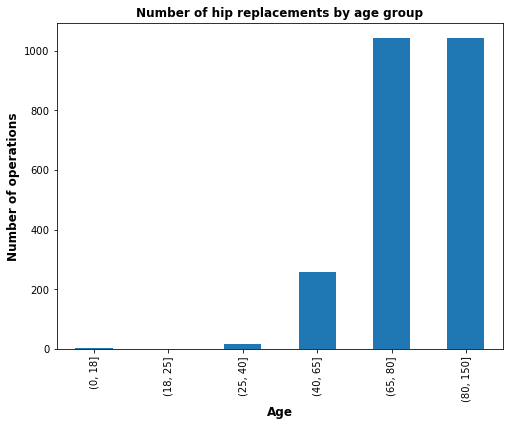

In [116]:
y = df19['new pre op OHS'].tolist()
ax12 = df19.plot.bar(figsize = (8,6))
ax12.get_legend().remove()
ax12.set_xlabel("Age", size = 12, weight = 'bold')
ax12.set_ylabel("Number of operations", size = 12, weight = 'bold')
ax12.set_title("Number of hip replacements by age group", size = 12, weight = 'bold')
plt.show()

In [117]:
df20 = data1[['DOB',  'Gender','new pre op OHS', 'new post op OHS','change_in_OHS']]
df20.head()

,DOB,Gender,new pre op OHS,new post op OHS,change_in_OHS
0,10/12/1954,F,20.0,11,-9.0
1,10/09/1932,M,17.0,45,28.0
2,07/05/1929,F,20.0,36,16.0
3,28/01/1955,F,15.0,48,33.0
4,11/04/1930,F,16.0,21,5.0


In [118]:
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df20['Age'] = df20['DOB'].apply(age)

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_7407/1537877986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20['Age'] = df20['DOB'].apply(age)


In [119]:
df20 = df20[['DOB', 'Age' ,'Gender','new pre op OHS', 'new post op OHS','change_in_OHS']]

In [120]:
df20.insert(loc=0, column='ID', value=[i for i in range(len(df20.index))])
df20 = df20.set_index('ID')
df20 = pd.DataFrame(df20)
ranges = [0,18,25,40,65,80,150]
df20 = df20.groupby(pd.cut(df20.Age, ranges)).mean()

In [121]:
df20 = df20[['change_in_OHS']]

In [122]:
df20

,change_in_OHS
Age,
"(0, 18]",23.000000
"(18, 25]",NaN
"(25, 40]",17.666667
"(40, 65]",18.548263
"(65, 80]",21.022094
"(80, 150]",19.372719


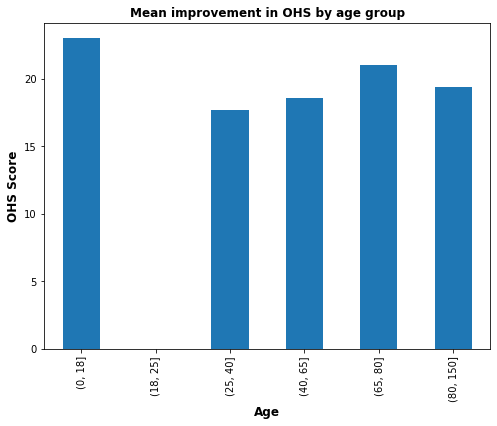

In [123]:
ax13 = df20.plot.bar(figsize = (8,6))
ax13.get_legend().remove()
ax13.set_xlabel("Age", size = 12, weight = 'bold')
ax13.set_ylabel("OHS Score", size = 12, weight = 'bold')
ax13.set_title("Mean improvement in OHS by age group", size = 12, weight = 'bold')
plt.show()

In [126]:
data1 = pd.read_csv('anonymised_data.csv')
data1 = pd.DataFrame(data1)
data1.head(2)

,DOB,operation date,Date of death,Gender,Pe-op Euroqol exam_date,Euroqol mobility,Euroqol self care,Euroqol activities,Euroqol pain,Euroqol anxiety,...,Post-op EQ5d 6m - 2yrs,6m-2yr mobility,6m-2yr self_care,6m-2yr activities,6m-2yr pain,6m-2yr anxiety,6m-2yr self_score,Unnamed: 77,Complications,Unnamed: 79
0,10/12/1954,19/06/2003,- -,F,- -,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN
1,10/09/1932,02/05/2008,- -,M,23/04/2008,02=I have some problems in walking about,02=I have some problems washing and dressing m...,02=I have some problems with performing my usu...,02=I have moderate pain or discomfort,01=I am not anxious or depressed,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN


In [125]:
for col in data1.columns:
    print(col)

DOB
operation date
Date of death
Gender
Pe-op Euroqol exam_date
Euroqol mobility
Euroqol self care
Euroqol activities
Euroqol pain
Euroqol anxiety
Euroqol self score
Euroqol form score
pre-op Oxford
Old pre-op OHS (collected old fashioned way)
new pre op OHS
side
post-op Oxford (collected old fashioned way)
Old post op OHS 
new post op OHS
Change in OHS
OHS 1 pre-op Pain
OHS 1 post-op pain
Change in Pain
OHS 2 pre-op washing
OHS 2 post-op washing
Change in washing
OHS 3 pre-op pub transport
OHS 3 post-op pub transport
Change in pub transport
OHS 4 pre-op Socks
OHS 4 post-op Socks
Change in socks
OHS 5 pre-op Shopping
OHS 5 post-op Shopping
Change in shopping
OHS 6 pre-op Walking
OHS 6 post-op Walking
Change in walking
OHS 7 pre-op Stairs
OHS 7 post-op stairs
Change in stairs
OHS 8 pre-op Chair
OHS 8 post-op Chair
Change in chair
OHS 9 pre-op Limp
OHS 9 post -op Limp
Change in limp
OHS 10 pre-op Severe pain
OHS 10 post-op Severe pain
Change in severe pain
OHS 11 pre-op Work
OHS 11 post-

In [127]:
df21 = data1[['DOB', 'Gender', 'Date of death', 'Euroqol mobility', 'Euroqol self care', 'Euroqol activities',
'Euroqol pain', 'Euroqol anxiety', 'Euroqol self score', 'Euroqol form score']]

In [131]:
df21 = df21.dropna()
df21.head(3)

,DOB,Gender,Date of death,Euroqol mobility,Euroqol self care,Euroqol activities,Euroqol pain,Euroqol anxiety,Euroqol self score,Euroqol form score
1,10/09/1932,M,- -,02=I have some problems in walking about,02=I have some problems washing and dressing m...,02=I have some problems with performing my usu...,02=I have moderate pain or discomfort,01=I am not anxious or depressed,85.0,0.59
3,28/01/1955,F,- -,02=I have some problems in walking about,01=I have no problems with self-care,02=I have some problems with performing my usu...,03=I have extreme pain or discomfort,01=I am not anxious or depressed,90.0,0.16
4,11/04/1930,F,- -,02=I have some problems in walking about,02=I have some problems washing and dressing m...,03=I am unable to perform my usual activities,02=I have moderate pain or discomfort,02=I am moderately anxious or depressed,50.0,0.19
